# Introduction to NLTK

This notebook walks through core NLTK concepts from the [NLTK Book](https://www.nltk.org/book/), covering:

1. **Exploring Text** - Concordance, similar words, dispersion plots, lexical diversity
2. **Tagging & Classification** - Tokenization, POS tagging, Naive Bayes classification
3. **Named Entity Recognition** - Extracting entities from text

## Setup

In [ ]:
import os
import nltk

nltk_data_dir = os.path.join(os.getcwd(), "nltk_data")
os.makedirs(nltk_data_dir, exist_ok=True)
nltk.data.path.append(nltk_data_dir)

nltk.download('book', download_dir=nltk_data_dir, quiet=True)
nltk.download('punkt', download_dir=nltk_data_dir, quiet=True)
nltk.download('punkt_tab', download_dir=nltk_data_dir, quiet=True)
nltk.download('averaged_perceptron_tagger', download_dir=nltk_data_dir, quiet=True)
nltk.download('maxent_ne_chunker', download_dir=nltk_data_dir, quiet=True)
nltk.download('words', download_dir=nltk_data_dir, quiet=True)
nltk.download('names', download_dir=nltk_data_dir, quiet=True)

True

---
# Part 1: Exploring Text (NLTK Book Ch. 1)

NLTK ships with several built-in text corpora. Let's load them and explore basic text analysis tools.

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851


text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus


text5: Chat Corpus
text6: Monty Python and the Holy Grail


text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Concordance
Show every occurrence of a word along with its surrounding context.

In [3]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


### Similar Words
Find words that appear in a similar context to the given word.

In [4]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [5]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


### Common Contexts
Find contexts shared by two or more words.

In [6]:
text2.common_contexts(["monstrous", "very"])

am_glad a_pretty a_lucky is_pretty be_glad


### Dispersion Plot
Visualize where words appear across the length of a text.

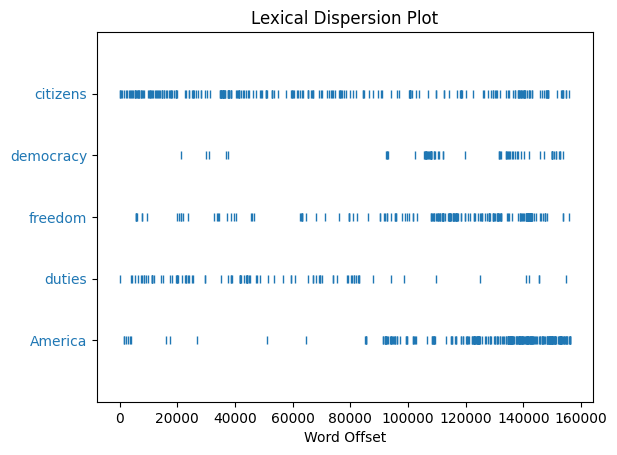

In [7]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

### Lexical Diversity
Measure how many unique words are used relative to the total word count.

In [8]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total

In [9]:
print(f"Text 3 (Genesis) lexical diversity: {lexical_diversity(text3):.4f}")
print(f"Text 3 length: {len(text3)} tokens")
print(f"Text 3 unique words: {len(set(text3))}")

Text 3 (Genesis) lexical diversity: 0.0623
Text 3 length: 44764 tokens
Text 3 unique words: 2789


---
# Part 2: Tagging & Classification (NLTK Book Ch. 5)

Moving beyond text exploration, NLTK provides tools for tokenization, part-of-speech tagging, and building text classifiers.

### Tokenization & POS Tagging
Split text into words and label each word with its part of speech.

In [ ]:
from nltk import word_tokenize

sample_text = "The quick brown fox jumps over the lazy dog near the river bank."
try:
    tokens = word_tokenize(sample_text)
    tagged = nltk.pos_tag(tokens)
    tagged
except LookupError:
    print("NLTK tokenizer/tagger data not available. Run nltk.download('punkt'), nltk.download('punkt_tab'), and nltk.download('averaged_perceptron_tagger').")

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/alexwermer-colan/nltk_data'
    - '/Users/alexwermer-colan/Code/Hawc2/.venv/nltk_data'
    - '/Users/alexwermer-colan/Code/Hawc2/.venv/share/nltk_data'
    - '/Users/alexwermer-colan/Code/Hawc2/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


### Naive Bayes Gender Classifier
Train a simple classifier that predicts gender from the last letter of a name.

In [11]:
import random
from nltk.corpus import names

labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
                 [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

def gender_features(word):
    return {'last_letter': word[-1]}

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [12]:
for name in ['Neo', 'Trinity', 'Alex', 'Sarah', 'Pat']:
    print(f"{name}: {classifier.classify(gender_features(name))}")

Neo: male
Trinity: female
Alex: male
Sarah: female
Pat: male


### Named Entity Recognition
Extract named entities (people, places, organizations) from text using NLTK's chunker.

In [ ]:
def extract_entities(text):
    try:
        sentences = nltk.sent_tokenize(text)
    except LookupError:
        print("NLTK tokenizer data not available. Run nltk.download('punkt') and nltk.download('punkt_tab').")
        return
    for sent in sentences:
        try:
            tokens = nltk.word_tokenize(sent)
            tagged = nltk.pos_tag(tokens)
            tree = nltk.ne_chunk(tagged)
        except LookupError:
            print("NLTK tagger/chunker data not available. Run nltk.download('averaged_perceptron_tagger'), nltk.download('maxent_ne_chunker'), and nltk.download('words').")
            return
        for subtree in tree:
            if hasattr(subtree, 'label'):
                entity = ' '.join(word for word, tag in subtree.leaves())
                print(f"  {subtree.label()}: {entity}")

In [14]:
sample = "Barack Obama was born in Hawaii. He served as President of the United States."
extract_entities(sample)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/alexwermer-colan/nltk_data'
    - '/Users/alexwermer-colan/Code/Hawc2/.venv/nltk_data'
    - '/Users/alexwermer-colan/Code/Hawc2/.venv/share/nltk_data'
    - '/Users/alexwermer-colan/Code/Hawc2/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
